## Code to compare mappability (via median per-bp mappability from k36.Bismap.MultiTrackMappability.bw; files located: http://hgdownload.soe.ucsc.edu/gbdb/hg38/hoffmanMappability/)

In [6]:
# LIBRARY:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

from scipy.stats import f_oneway

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline
%matplotlib nbagg

%cd /Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/ChromHMM_analyses/hg38_mappability

/Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/ChromHMM_analyses/hg38_mappability


In [7]:
## Load df of GTEx genes with their mappability scores and z_scores:

df = pd.read_csv('GTEX-ALL_SAMPLES.k36.Bismap.MultiTrackMappability.median_map.bed', sep='\t')

df.head()

,CHR,start,stop,GENE_ID,GENE_NAME,z_score,mappability
0,chr1,825137,859446,ENSG00000228794.8,LINC01128,0.315991,0.500000
1,chr1,916869,919692,ENSG00000223764.2,RP11-54O7.3,0.915775,1.000000
2,chr1,944581,959309,ENSG00000188976.10,NOC2L,-0.276891,0.583333
3,chr1,960586,965715,ENSG00000187961.13,KLHL17,-0.399756,0.527778
4,chr1,966496,975108,ENSG00000187583.10,PLEKHN1,-0.325026,0.694444


In [8]:
## Separate X-Chr, RME and Biallelic genes:

df['mosaic_category'] = np.where(df['z_score'] >= 0.74, 'RME', 'Unknown')
df['mosaic_category'] = np.where(df['z_score'] < 0, 'Biallelic', df['mosaic_category'])
df['mosaic_category'] = np.where(df['CHR'] == 'chrX', 'X-Chr.', df['mosaic_category'])

df.head()

,CHR,start,stop,GENE_ID,GENE_NAME,z_score,mappability,mosaic_category
0,chr1,825137,859446,ENSG00000228794.8,LINC01128,0.315991,0.500000,Unknown
1,chr1,916869,919692,ENSG00000223764.2,RP11-54O7.3,0.915775,1.000000,RME
2,chr1,944581,959309,ENSG00000188976.10,NOC2L,-0.276891,0.583333,Biallelic
3,chr1,960586,965715,ENSG00000187961.13,KLHL17,-0.399756,0.527778,Biallelic
4,chr1,966496,975108,ENSG00000187583.10,PLEKHN1,-0.325026,0.694444,Biallelic


<IPython.core.display.Javascript object>


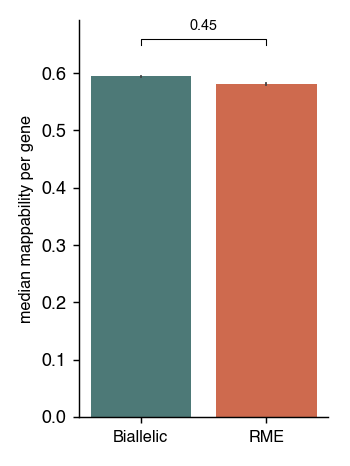

[Text(0, 0, 'Biallelic'), Text(1, 0, 'RME')]

In [4]:
## RME vs. Biallelic Boxplots:

f, ax = plt.subplots(figsize=(1.5, 2), tight_layout=True)
sns.despine()

df = df.dropna()

kw_pval = stats.kruskal(np.array(df.loc[df['mosaic_category'] == 'RME', 'mappability']), np.array(df.loc[df['mosaic_category'] == 'Biallelic', 'mappability']), nan_policy='omit') ## np.array(df.loc[df['mosaic_category'] == 'X-Chr.', 'mappability']), 
#f_oneway = stats.f_oneway(df[df['mosaic_category'] == 'Biallelic']['mappability'], df[df['mosaic_category'] == 'RME']['mappability'])

df = df[df['mosaic_category'] != 'Unknown']
df = df[df['mosaic_category'] != 'X-Chr.']

#ax = sns.boxplot(x='mosaic_category', y='mappability', data=df, order=["Biallelic", "RME"], linewidth=0.5, whis=1, width=0.7, palette=["#46807D","#E35E39"], showfliers=True, fliersize=0.5)
ax = sns.barplot(x='mosaic_category', y='mappability', data=df, order=["Biallelic", "RME"], palette=["#46807D","#E35E39"], ci=68, errwidth=1)
ax.plot([0, 0, 1, 1], [0.65, 0.66, 0.66, 0.65], lw=0.6, c='k')
ax.text(0.5, 0.67, "%.2g" % kw_pval.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("median mappability per gene", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RME'], fontsize=9, fontweight='light')

#plt.savefig('../../bb_test_results/qvalues/QC_SupplementalFigures/GTEX-ALL_SAMPLES.k36_mappability.barplot.ci68.pdf', transparent=True)


In [9]:
df.shape

(19970, 8)

In [5]:
df.head()

,CHR,start,stop,GENE_ID,GENE_NAME,z_score,mappability,mosaic_category
1,chr1,916869,919692,ENSG00000223764.2,RP11-54O7.3,0.915775,1.000000,RME
2,chr1,944581,959309,ENSG00000188976.10,NOC2L,-0.276891,0.583333,Biallelic
3,chr1,960586,965715,ENSG00000187961.13,KLHL17,-0.399756,0.527778,Biallelic
4,chr1,966496,975108,ENSG00000187583.10,PLEKHN1,-0.325026,0.694444,Biallelic
5,chr1,1081817,1116361,ENSG00000131591.17,C1orf159,-0.377295,0.555556,Biallelic


<IPython.core.display.Javascript object>


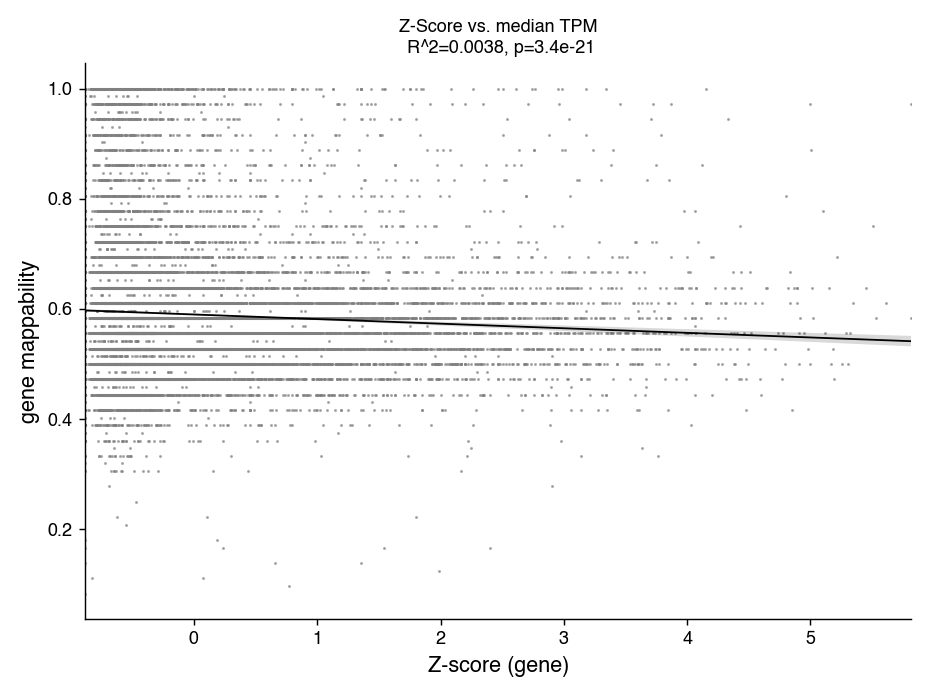

0.0037811918678435233


FileNotFoundError: [Errno 2] No such file or directory: '../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene-mappability.vs.z-score_regplot.pdf'

In [15]:
## Plotting z-score vs. mappability:

f, ax = plt.subplots(figsize=(4,3), tight_layout=True)
sns.despine()

df_toPlot = df[df['mosaic_category'] != 'X-Chr.']
df_toPlot = df_toPlot.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_toPlot['z_score'], df_toPlot['mappability'])
r_squared = r_value ** 2

ax = sns.regplot(data=df_toPlot, x=df_toPlot['z_score'], y=df_toPlot['mappability'], fit_reg=True, truncate=True, ci=95, scatter_kws={"color":"grey", "s": 0.5, "alpha": 0.6, 'rasterized': True}, line_kws={"color":"black", "lw":1})
ax.set_xlabel('Z-score (gene)', fontsize=12, fontweight='light')
ax.set_ylabel('gene mappability', fontsize=12, fontweight='light')
ax.set_title('Z-Score vs. median TPM\n R^2={0:.2g}, p={1:.2g}'.format(r_squared, p_value), fontsize=10)

print(r_squared)
#f.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene-mappability.vs.z-score_regplot.pdf', dpi=400, transparent=True)


(23578, 8)